In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import warnings
     

In [2]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.12.0



In [3]:
import os

In [4]:
import tensorflow as tf

IMAGE_SIZE = 256
BATCH_SIZE = 32


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\ASUS\\OneDrive\\Pictures\\Indian-Food-Images",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 80 classes.


In [5]:
class_names = dataset.class_names
class_names
     

['adhirasam',
 'aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'anarsa',
 'ariselu',
 'bandar_laddu',
 'basundi',
 'bhatura',
 'bhindi_masala',
 'biryani',
 'boondi',
 'butter_chicken',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chhena_kheeri',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chikki',
 'daal_baati_churma',
 'daal_puri',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'doodhpak',
 'double_ka_meetha',
 'dum_aloo',
 'gajar_ka_halwa',
 'gavvalu',
 'ghevar',
 'gulab_jamun',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kajjikaya',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'kofta',
 'kuzhi_paniyaram',
 'lassi',
 'ledikeni',
 'litti_chokha',
 'lyangcha',
 'maach_jhol',
 'makki_di_roti_sarson_da_saag',
 'malapua',
 'misi_roti',
 'misti_doi',
 'modak',
 'mysore_pak',
 'naan',
 'navrattan_korma',
 'palak_paneer',
 'paneer_butter_masala',
 'phirni',
 'pithe',
 'poha',
 'poornalu

In [7]:
len(dataset)

125

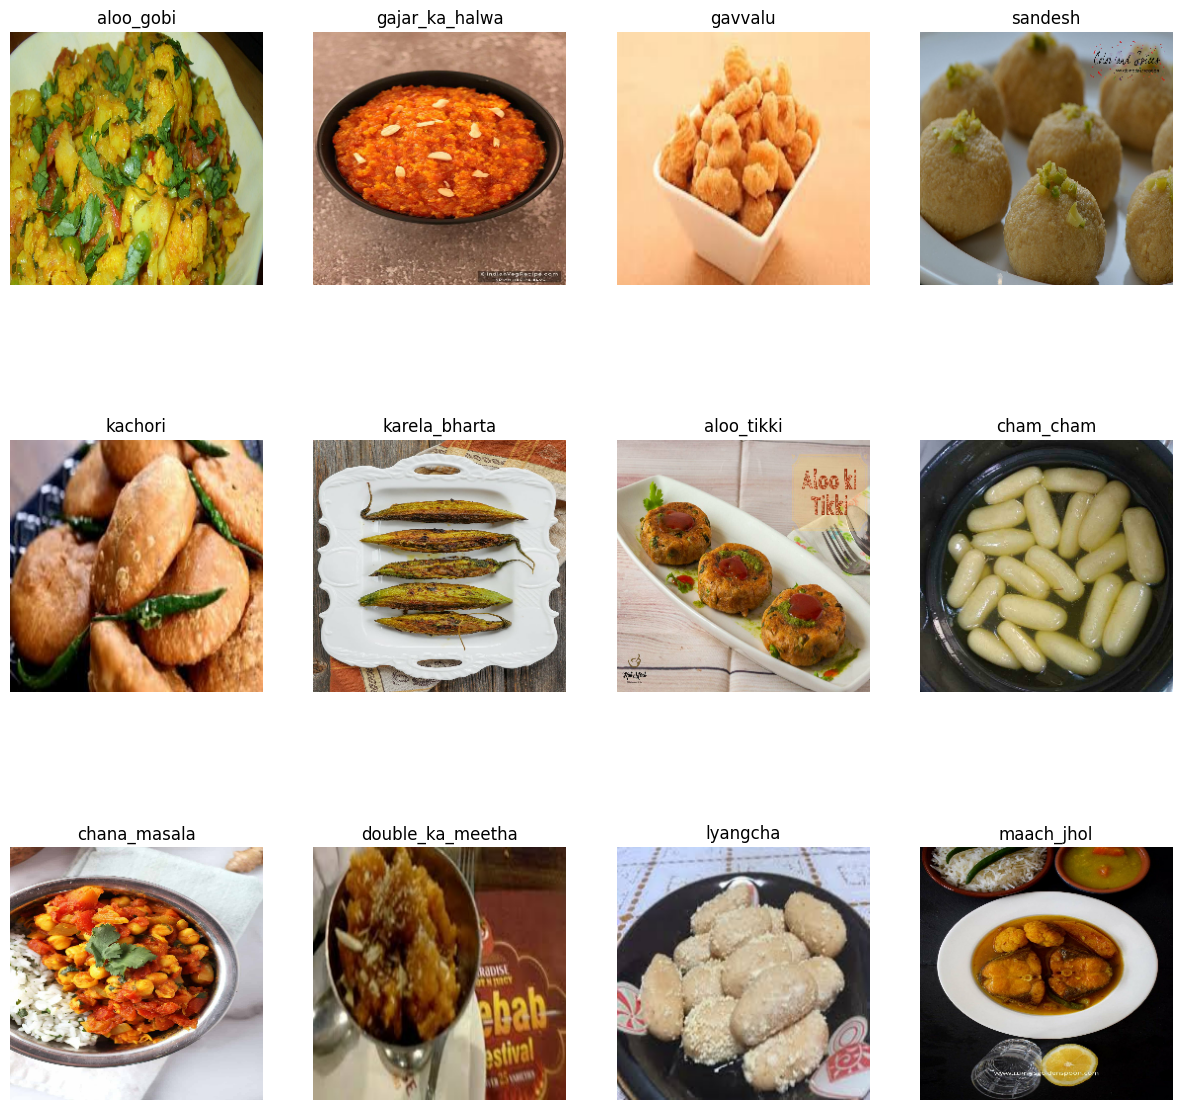

In [8]:
plt.figure(figsize = (15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        a = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds

In [11]:
train_ds , test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(train_ds)

100

In [14]:
len(test_ds)

13

In [15]:
len(val_ds)

12

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(256,256),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ])
     

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])
     

In [19]:
input_shape = (32,256,256,3)
n_classes = len(class_names)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
])
model.build(input_shape = input_shape)
     

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)
     

First Image to Predict:
Actual Label: naan
1/1 [==============================] - 1s 548ms/step
Predicted Label: anarsa


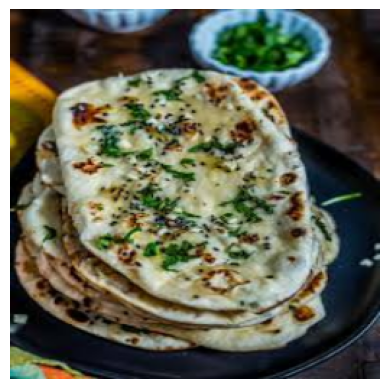

In [22]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to Predict:")
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual Label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
     

In [23]:

def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
     
    